# Exploring the Data

In [29]:
# All the imports needed for this notebook
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_columns', 50)
warnings.filterwarnings('ignore')

#Used for the correlation matrix
sns.set_theme(context="notebook", font_scale=0.9)
plt.rcParams.update({
    "figure.figsize": (14, 12),
    "figure.dpi": 140,
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
})
sns.set_theme(color_codes=True)

## 1. Reading the Dataset

In [30]:
# Make sure to change to your path after cloning
# Defining different paths
desktop_path = '/home/kylep/ML/ML_Projects/nba_web_app_predictor/data/training_dataset.csv'
laptop_path = '/home/kylep/ML/projects/nba_web_app_predictor/data/training_dataset.csv'

# Use whichever exists
if os.path.exists(desktop_path):
    train_data = pd.read_csv(desktop_path)
elif os.path.exists(laptop_path):
    train_data = pd.read_csv(laptop_path)
else:
    raise FileNotFoundError("Data file not found on either path")
print(f"The shape of the data set is: {train_data.shape}!")
display(train_data.head())
print()
print("Here are the dtypes of the training dataset:")
train_data.info()


The shape of the data set is: (16512, 25)!


,Player,Tm,Opp,Res,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,Data
0,Jayson Tatum,BOS,NYK,W,30.30,14,18,0.778,8,11,0.727,1,2,0.500,0,4,4,10,1,1,1,1,37,38.1,2024-10-22
1,Anthony Davis,LAL,MIN,W,37.58,11,23,0.478,1,3,0.333,13,15,0.867,3,13,16,4,1,3,1,1,36,34.0,2024-10-22
2,Derrick White,BOS,NYK,W,26.63,8,13,0.615,6,10,0.600,2,2,1.000,0,3,3,4,1,0,0,1,24,22.4,2024-10-22
3,Jrue Holiday,BOS,NYK,W,30.52,7,9,0.778,4,6,0.667,0,0,0.000,2,2,4,4,1,0,0,2,18,19.5,2024-10-22
4,Miles McBride,NYK,BOS,L,25.85,8,10,0.800,4,5,0.800,2,3,0.667,0,0,0,2,0,0,1,1,22,17.8,2024-10-22



Here are the dtypes of the training dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  16512 non-null  object 
 1   Tm      16512 non-null  object 
 2   Opp     16512 non-null  object 
 3   Res     16512 non-null  object 
 4   MP      16512 non-null  float64
 5   FG      16512 non-null  int64  
 6   FGA     16512 non-null  int64  
 7   FG%     16512 non-null  float64
 8   3P      16512 non-null  int64  
 9   3PA     16512 non-null  int64  
 10  3P%     16512 non-null  float64
 11  FT      16512 non-null  int64  
 12  FTA     16512 non-null  int64  
 13  FT%     16512 non-null  float64
 14  ORB     16512 non-null  int64  
 15  DRB     16512 non-null  int64  
 16  TRB     16512 non-null  int64  
 17  AST     16512 non-null  int64  
 18  STL     16512 non-null  int64  
 19  BLK     16512 non-null  int64  
 20  TOV     16512 non-null  in

### Renaming the last column 

I've noticed that the last column contains the date, but is named 'Data'. I am going to rename that column and change the datatype.

In [31]:
train_data.rename(columns={'Data' : 'Date'}, inplace=True)
train_data['Date'] = pd.to_datetime(train_data['Date'])
display(train_data.head())
train_data.info()

,Player,Tm,Opp,Res,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,Date
0,Jayson Tatum,BOS,NYK,W,30.30,14,18,0.778,8,11,0.727,1,2,0.500,0,4,4,10,1,1,1,1,37,38.1,2024-10-22
1,Anthony Davis,LAL,MIN,W,37.58,11,23,0.478,1,3,0.333,13,15,0.867,3,13,16,4,1,3,1,1,36,34.0,2024-10-22
2,Derrick White,BOS,NYK,W,26.63,8,13,0.615,6,10,0.600,2,2,1.000,0,3,3,4,1,0,0,1,24,22.4,2024-10-22
3,Jrue Holiday,BOS,NYK,W,30.52,7,9,0.778,4,6,0.667,0,0,0.000,2,2,4,4,1,0,0,2,18,19.5,2024-10-22
4,Miles McBride,NYK,BOS,L,25.85,8,10,0.800,4,5,0.800,2,3,0.667,0,0,0,2,0,0,1,1,22,17.8,2024-10-22


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Player  16512 non-null  object        
 1   Tm      16512 non-null  object        
 2   Opp     16512 non-null  object        
 3   Res     16512 non-null  object        
 4   MP      16512 non-null  float64       
 5   FG      16512 non-null  int64         
 6   FGA     16512 non-null  int64         
 7   FG%     16512 non-null  float64       
 8   3P      16512 non-null  int64         
 9   3PA     16512 non-null  int64         
 10  3P%     16512 non-null  float64       
 11  FT      16512 non-null  int64         
 12  FTA     16512 non-null  int64         
 13  FT%     16512 non-null  float64       
 14  ORB     16512 non-null  int64         
 15  DRB     16512 non-null  int64         
 16  TRB     16512 non-null  int64         
 17  AST     16512 non-null  int64         
 18  STL   

## 2. Exploratory Data Analysis (EDA)

### Checking for missing values

In [32]:
# Checking for NaN values in columns
null_counts = train_data.isnull().sum()
print(null_counts)

Player    0
Tm        0
Opp       0
Res       0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
GmSc      0
Date      0
dtype: int64


### Seperating the Numerical and Categorical Columns

In [33]:
num_cols = train_data.select_dtypes(exclude=['object', 'datetime64[ns]'])
print("Here are the numerical columns:")
display(num_cols)

cat_cols = train_data.select_dtypes(include=['object', 'datetime64[ns]'])
print("Here are the categorical columns:")
display(cat_cols)

Here are the numerical columns:


,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc
0,30.30,14,18,0.778,8,11,0.727,1,2,0.500,0,4,4,10,1,1,1,1,37,38.1
1,37.58,11,23,0.478,1,3,0.333,13,15,0.867,3,13,16,4,1,3,1,1,36,34.0
2,26.63,8,13,0.615,6,10,0.600,2,2,1.000,0,3,3,4,1,0,0,1,24,22.4
3,30.52,7,9,0.778,4,6,0.667,0,0,0.000,2,2,4,4,1,0,0,2,18,19.5
4,25.85,8,10,0.800,4,5,0.800,2,3,0.667,0,0,0,2,0,0,1,1,22,17.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,5.18,0,2,0.000,0,2,0.000,0,0,0.000,0,0,0,2,0,0,0,2,0,-0.8
16508,20.75,1,5,0.200,0,2,0.000,0,0,0.000,0,1,1,1,0,0,0,2,2,-0.9
16509,16.70,0,5,0.000,0,3,0.000,0,0,0.000,2,1,3,2,0,0,1,0,0,-1.4
16510,20.70,1,5,0.200,0,4,0.000,0,0,0.000,0,5,5,1,0,0,3,2,2,-2.7


Here are the categorical columns:


,Player,Tm,Opp,Res,Date
0,Jayson Tatum,BOS,NYK,W,2024-10-22
1,Anthony Davis,LAL,MIN,W,2024-10-22
2,Derrick White,BOS,NYK,W,2024-10-22
3,Jrue Holiday,BOS,NYK,W,2024-10-22
4,Miles McBride,NYK,BOS,L,2024-10-22
...,...,...,...,...,...
16507,Emoni Bates,CLE,WAS,W,2025-02-07
16508,A.J. Green,MIL,ATL,L,2025-02-07
16509,Kenrich Williams,OKC,TOR,W,2025-02-07
16510,Tyrese Martin,BRK,MIA,W,2025-02-07


 #  3. Visualizations 

## Histograms and Box Plots

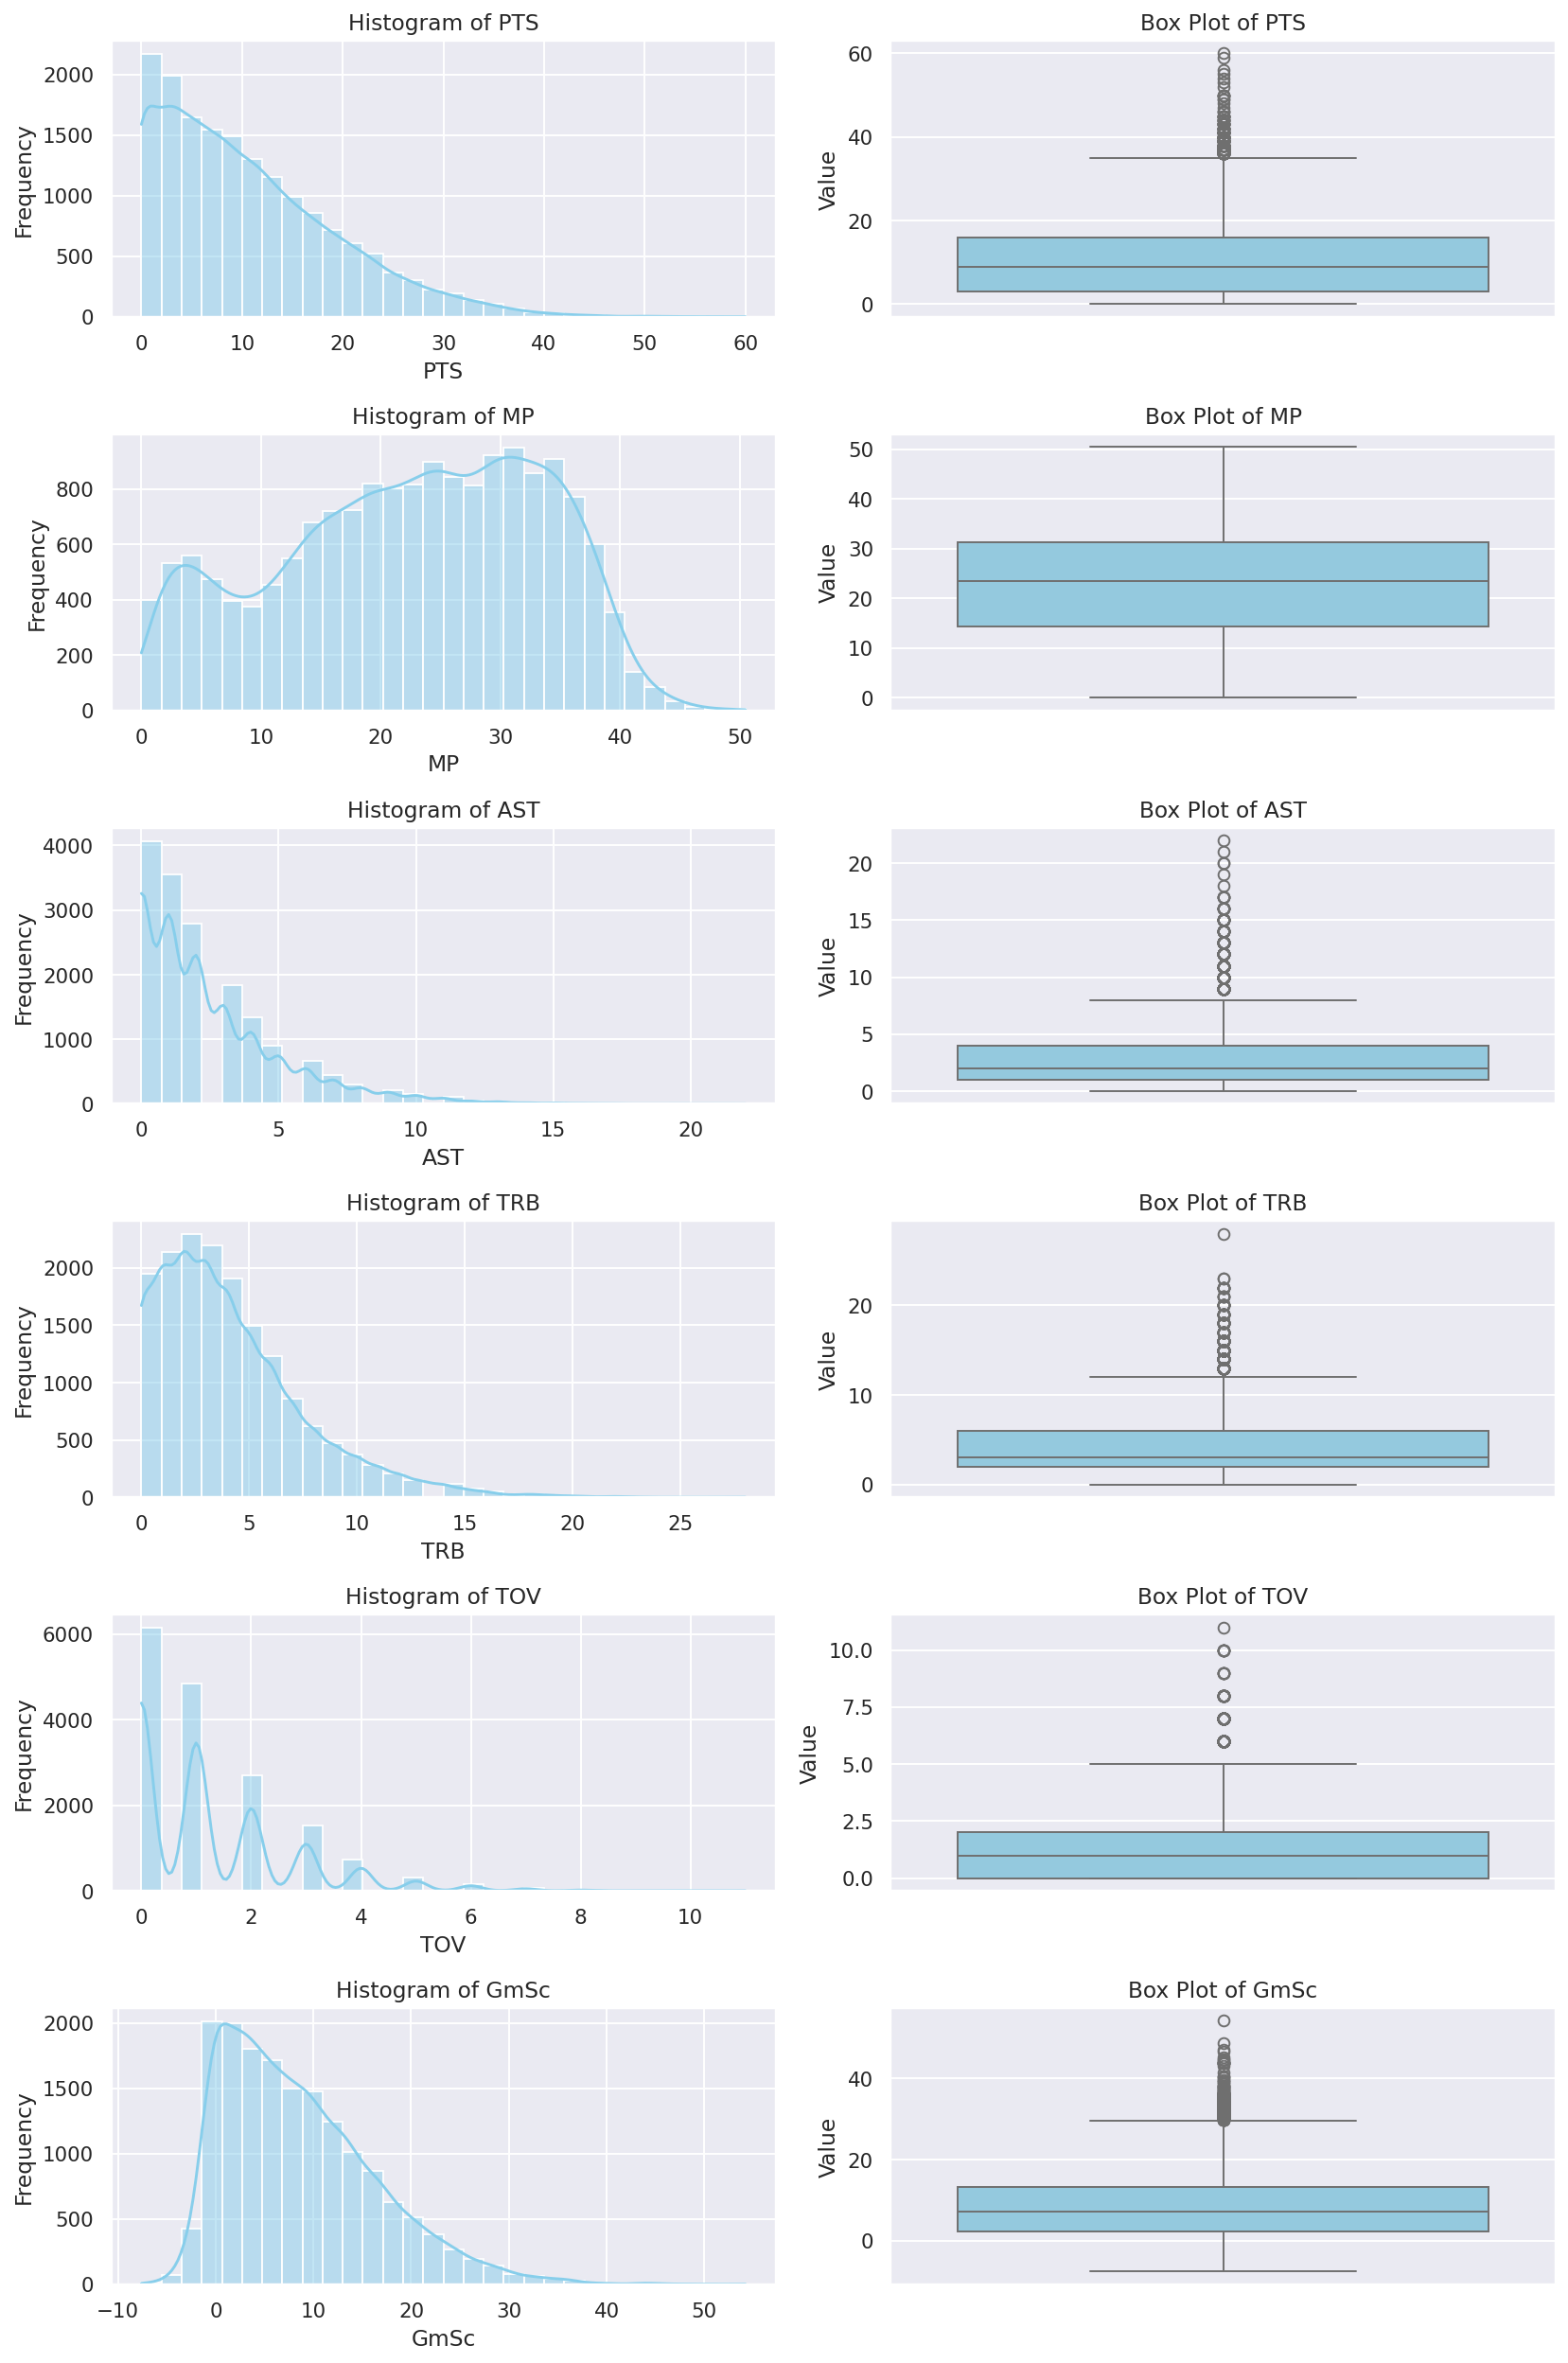

In [34]:
# Get the numerical columns in a list
num_list = train_data.select_dtypes(exclude=['object', 'datetime64[ns]']).columns.tolist()
# Columns I would like to see visualizations on 
new_num_loc = train_data[num_list].loc[: , ['PTS', 'MP', 'AST', 'TRB', 'TOV', 'GmSc']]
variables = len(new_num_loc.columns)
fig, axes = plt.subplots(variables, 2, figsize=(12, 18))

for i, column in enumerate(new_num_loc.columns):  # Iterate over column names
    sns.histplot(data=new_num_loc, x=column, kde=True, bins=30, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'Histogram of {column}')
    axes[i, 0].set_ylabel("Frequency")
    
    sns.boxplot(data=new_num_loc, y=column, ax=axes[i, 1], color='skyblue')
    axes[i, 1].set_title(f'Box Plot of {column}')
    axes[i, 1].set_ylabel("Value")

plt.tight_layout()
plt.show()

## Correlation Matrix

<function matplotlib.pyplot.show(close=None, block=None)>

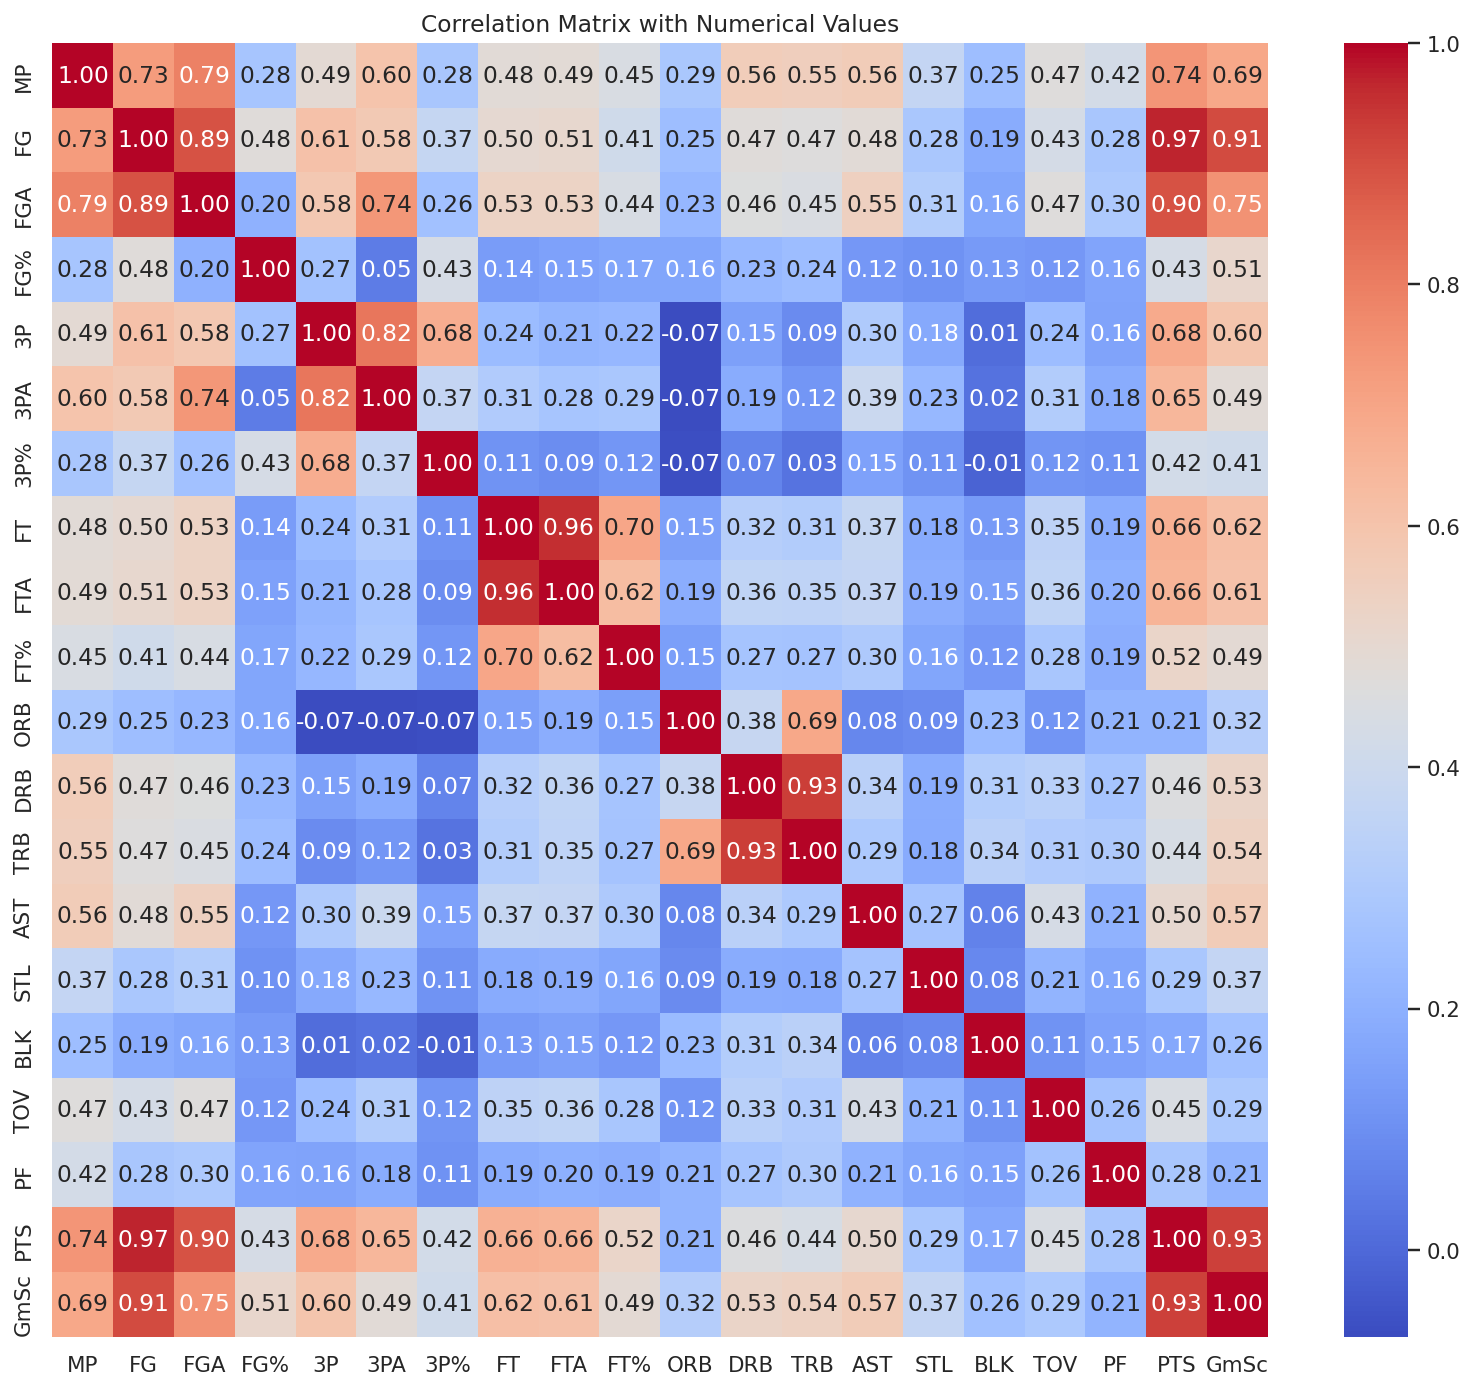

In [35]:
plt.Figure(figsize=(14, 12))
correlation_matrix = num_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix with Numerical Values')
plt.show

GmSc (Game Score) formula:
Game Score Formula=(Points)+0.4*(Field Goals Made)+0.7*(Offensive Rebounds)+0.3*(Defensive rebounds)+(Steals)+0.7*(Assists)+0.7*(Blocked Shots)- 0.7*(Field Goal Attempts)-0.4*(Free Throws Missed) – 0.4*(Personal Fouls)-(Turnovers)